In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from os import listdir
import re
import pickle
%matplotlib inline

In [2]:
labels = pd.read_csv('../data/original/train.csv')
labels_and_locations = []
for label in labels['labels']:
    x = np.array(label.split(' ')).reshape(-1, 5)
    labels_and_locations.append(x)
labels['labels']=labels_and_locations

In [3]:
labels.head()

,image_id,labels
0,100241706_00004_2,"[[U+306F, 1231, 3465, 133, 53], [U+304C, 275, ..."
1,100241706_00005_1,"[[U+306F, 1087, 2018, 103, 65], [U+304B, 1456,..."
2,100241706_00005_2,"[[U+306F, 572, 1376, 125, 57], [U+306E, 1551, ..."
3,100241706_00006_1,"[[U+3082, 1455, 3009, 65, 44], [U+516B, 1654, ..."
4,100241706_00007_2,"[[U+309D, 1201, 2949, 27, 33], [U+309D, 1196, ..."


In [6]:
labels.loc[0, 'labels']

array([['U+306F', '1231', '3465', '133', '53'],
       ['U+304C', '275', '1652', '84', '69'],
       ['U+3044', '1495', '1218', '143', '69'],
       ['U+3051', '220', '3331', '53', '91'],
       ['U+306B', '911', '1452', '61', '92'],
       ['U+306B', '927', '3445', '71', '92'],
       ['U+306E', '904', '2879', '95', '92'],
       ['U+5DE5', '1168', '1396', '187', '95'],
       ['U+3053', '289', '3166', '69', '97'],
       ['U+4E09', '897', '3034', '121', '107'],
       ['U+306E', '547', '1912', '141', '108'],
       ['U+3084', '1489', '2675', '151', '109'],
       ['U+3068', '1561', '2979', '55', '116'],
       ['U+5DF1', '1513', '2500', '127', '117'],
       ['U+3082', '1213', '1523', '72', '119'],
       ['U+3055', '1219', '3266', '95', '124'],
       ['U+306E', '259', '2230', '68', '125'],
       ['U+306E', '1184', '2423', '169', '125'],
       ['U+4E16', '849', '2236', '163', '127'],
       ['U+7D30', '1144', '1212', '200', '128'],
       ['U+305D', '316', '3287', '57', '133'],
  

In [7]:
train_filenames = listdir('../data/original/train_images/')

train_images = []
y = []
counter=0
for fp in train_filenames:
    if (counter%100==0):
        print(counter)
    counter+=1
    img = Image.open(f'../data/original/train_images/{fp}').convert(mode='L')
    for subimg in list(labels[labels['image_id']==fp[:-4]]['labels'])[0]:
        y.append(subimg[0])
        coords = list(subimg[1:])
        coords = tuple([int(coord) for coord in coords])
        coords = (coords[0], coords[1], coords[0]+coords[2], coords[1]+coords[3])
        train_images.append(img.crop(coords))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


In [8]:
len(y)

683464

In [9]:
len(train_images)

683464

In [10]:
train_df = pd.DataFrame([train_images, y]).T

In [11]:
train_df.columns=['img', 'char_unicode']

In [12]:
train_df.head()

,img,char_unicode
0,<PIL.Image.Image image mode=L size=105x17 at 0...,U+4E00
1,<PIL.Image.Image image mode=L size=33x18 at 0x...,U+30EC
2,<PIL.Image.Image image mode=L size=102x18 at 0...,U+4E00
3,<PIL.Image.Image image mode=L size=39x27 at 0x...,U+30EC
4,<PIL.Image.Image image mode=L size=33x28 at 0x...,U+30EC


In [13]:
with open('../data/extracted_train/train_df.txt', 'wb') as fp:
    pickle.dump(train_df, fp)

In [14]:
train_df['img'][1]

In [15]:
conversion = pd.read_csv('../data/original/unicode_translation.csv')
conversion.columns=['unicode', 'char']
conversion.head()

,unicode,char
0,U+0031,1
1,U+0032,2
2,U+0034,4
3,U+0036,6
4,U+0039,9


In [16]:
train_df.columns = ['img', 'unicode']

In [17]:
train_df = train_df.set_index('unicode').join(conversion.set_index('unicode'))

In [18]:
train_df.head()

,img,char
unicode,,
U+003F,<PIL.Image.Image image mode=L size=118x149 at ...,?
U+2000B,<PIL.Image.Image image mode=L size=99x108 at 0...,𠀋
U+2000B,<PIL.Image.Image image mode=L size=96x113 at 0...,𠀋
U+2000B,<PIL.Image.Image image mode=L size=105x134 at ...,𠀋
U+2000B,<PIL.Image.Image image mode=L size=100x110 at ...,𠀋


前


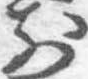

In [19]:
ind = 500000

print(train_df.reset_index()['char'][ind])
train_df.reset_index()['img'][ind]

In [20]:
# with open('../data/extracted_train/train_df.txt', 'wb') as fp:
#     pickle.dump(train_df, fp)